# **_Matrix Multiplication: Fourier Transform_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This Python Jupyter notebook consists of my solution to a math/coding challenge from Mike X. Cohen's Linear Algebra course on Udemy.

-   Udemy course: https://www.udemy.com/course/linear-algebra-theory-and-implementation

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Background:_**

#### **_We can manually generate a Fourier Matrix with the formula:_**

$$
\Huge
    \textbf{F}_{j,k} = \omega^m \\
$$

#### **_Where:_**

$$
\large
    \begin{gathered}
        \omega = e^{\frac{-2\pi \sqrt{-1}}{n}} \\
        m = (j - 1)(k - 1)
    \end{gathered}
$$

-   $\sqrt{-1}$ is imaginary number $i$.

    -   $n$ is the number of rows/columns.

-   $\textbf{F}$ is a square matrix.

-   $j,k$ indicates the matrix's $j^{th}$,$k^{th}$ elements.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Instructions:_**

-   The goal is to implement the Fourier Transform with Matrix Multiplication.

-   Manually generate a Fourier Matrix $\textbf{F}$ and multiply it by a vector $x$.

    -   The product is a vector of Fourier Coefficients, $X$.

-   Confirm this result by using Numpy's `fft.fft()` method (Fast Fourier Transform).

    -   Plot and compare both results.

-   Extract the real and imaginary parts of $\textbf{F}$, creating separate Real and Imaginary valued matrices.

    -   Generate image colormaps for both of these matrices. Compare.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Code:_**

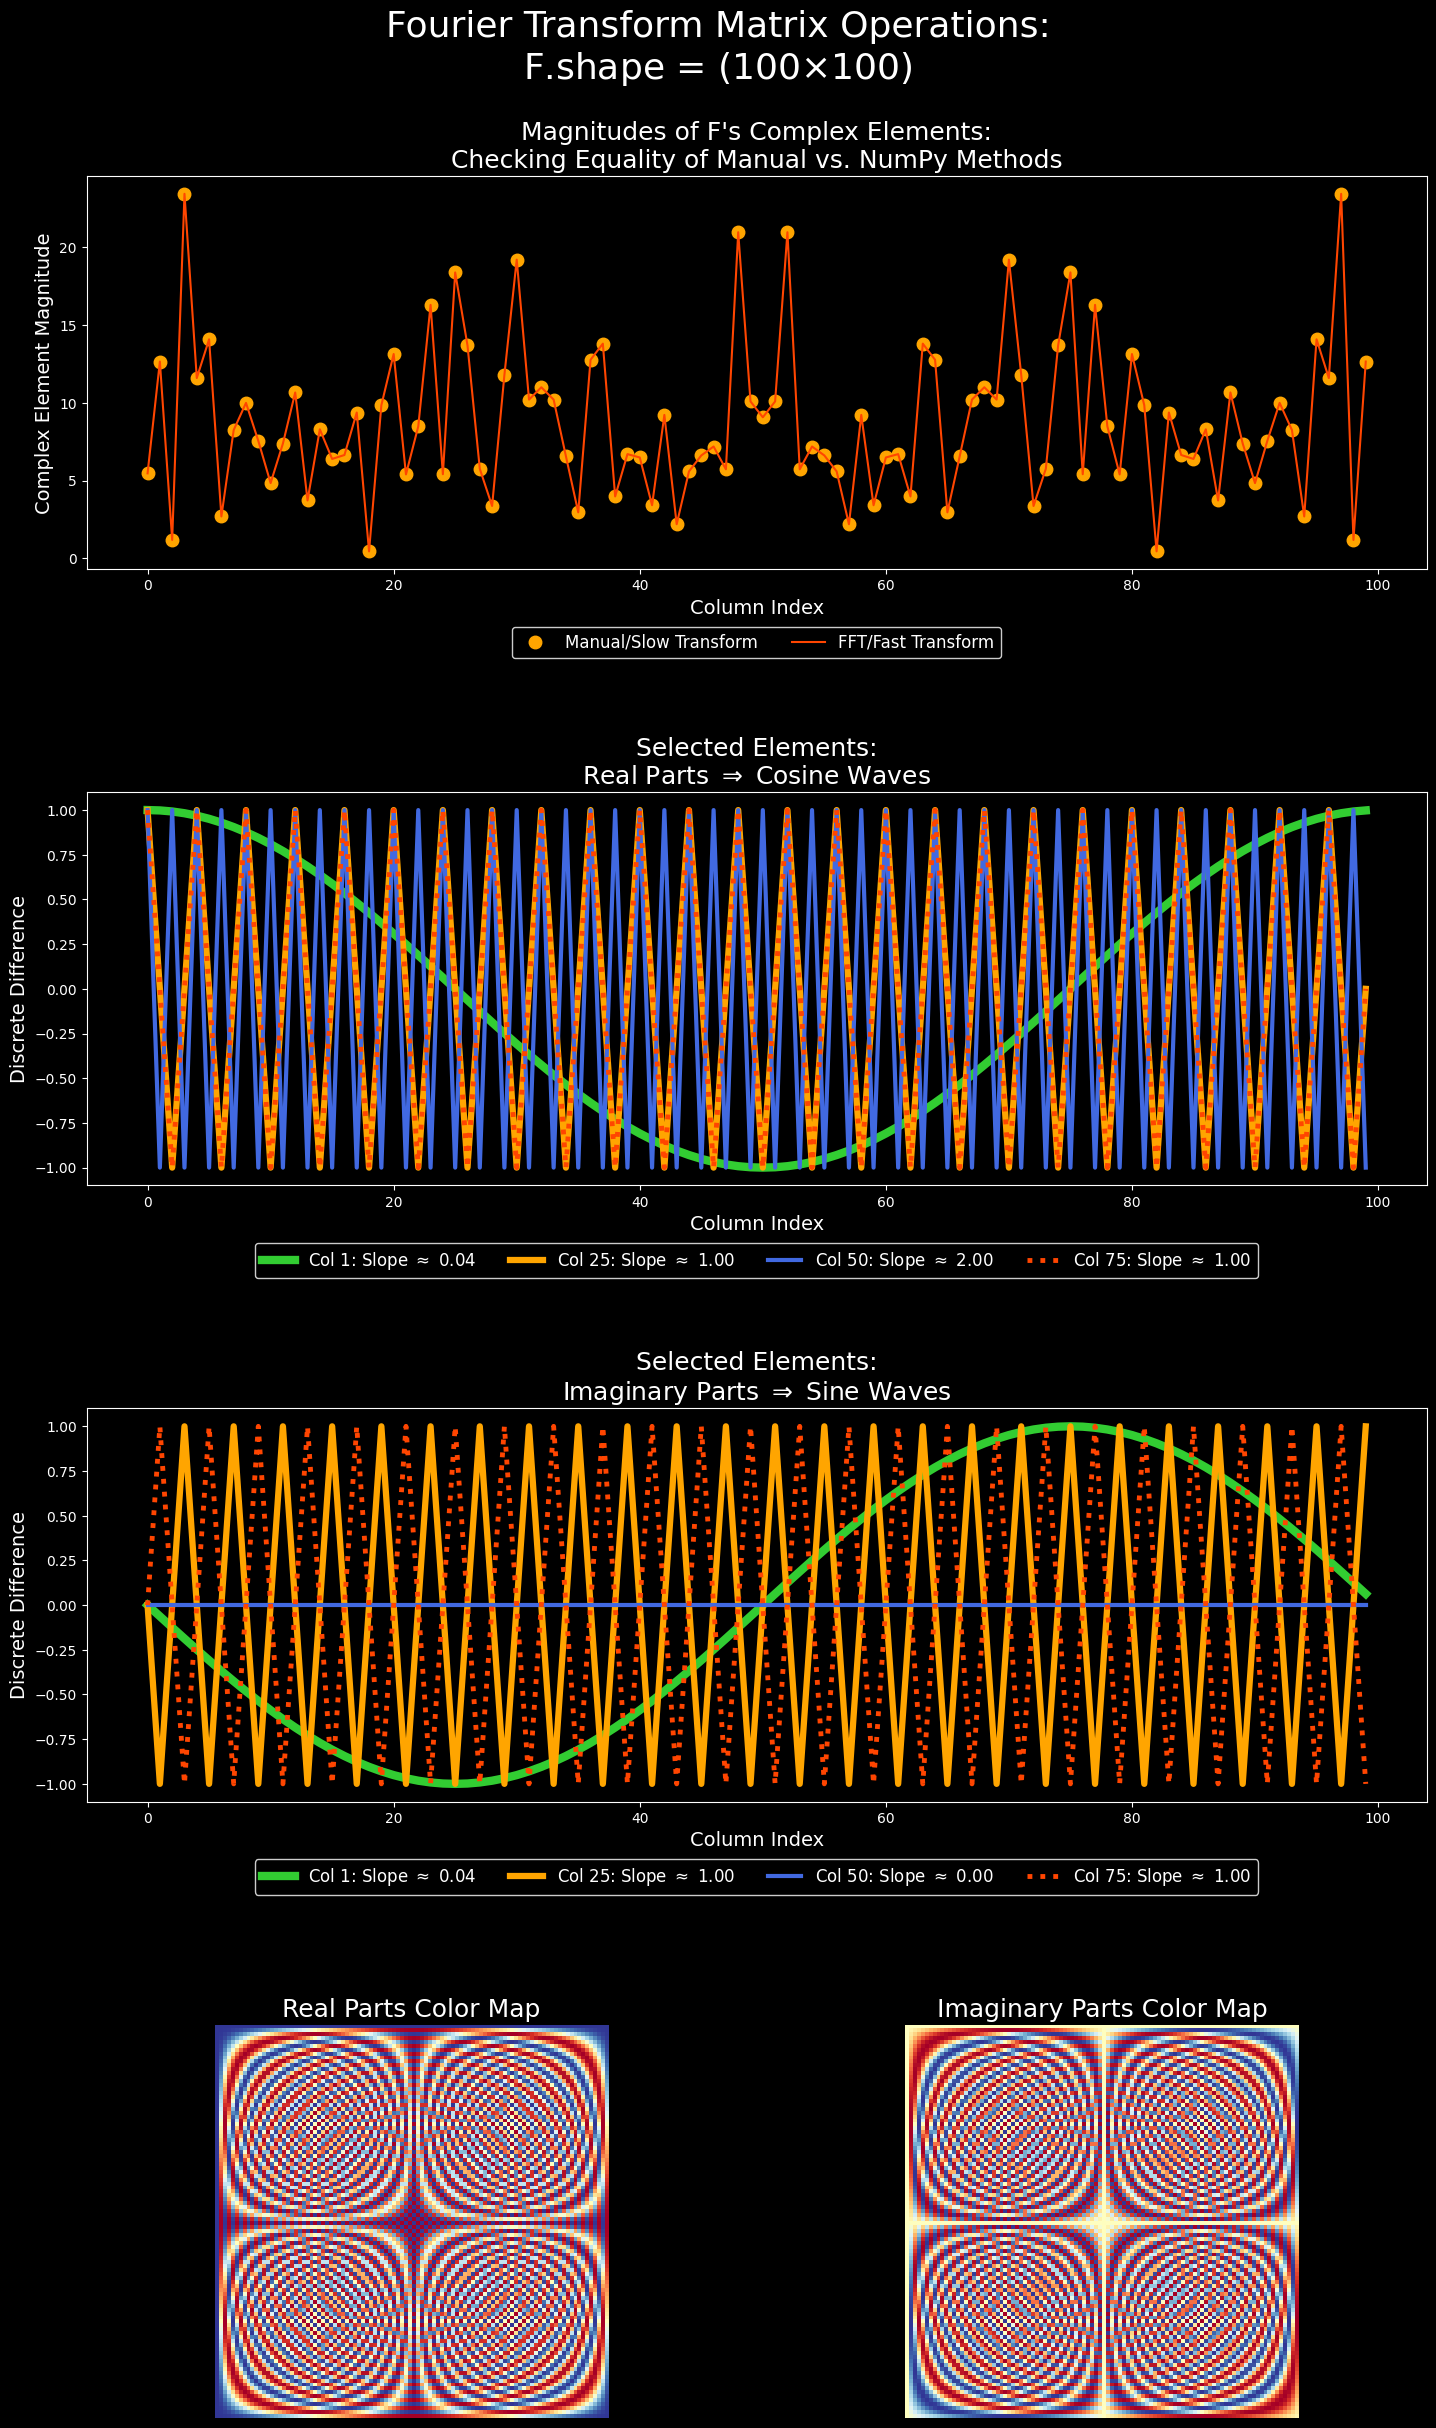

In [1]:
# Import libraries:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft

n = 100  # Number of elements, experiment with different values
omega = np.exp((-2 * np.pi * 1j) / n)  # Same omega for everyone

# Create matrix with `np.meshgrid()`. More efficient than double
#  `for` loop:
j, k = np.meshgrid(np.arange(n), np.arange(n), indexing='ij')
F = omega ** (j * k)

# Instantiate vector `x`:
x = np.random.randn(n)

X_SLOW = x @ F  # Transform `F` w/manually created matrix
X_FFT = fft.fft(x)  # Transform `F` via NumPy built-in method

# Assert a dark style:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(15, 25))  # Large height for four rows

    # Instantiate subplots with `GridSpec()`
    #  functionality/indexing:
    gs = GridSpec(4, 2, figure=fig)
    axes = [
        fig.add_subplot(gs[0, :]),
        fig.add_subplot(gs[1, :]),
        fig.add_subplot(gs[2, :]),
        fig.add_subplot(gs[3, :-1]),
        fig.add_subplot(gs[3, 1:]),
    ]

    # # First plot to check our math...
    # Plot manual matrix as dots:
    axes[0].plot(abs(X_SLOW), 'o', ms=9, color='orange', label="Manual/Slow Transform")
    # Plot NumPy matrix as lines
    axes[0].plot(abs(X_FFT), '-', color='orangered', label="FFT/Fast Transform")
    # Build title:
    title_0 = "Magnitudes of F's Complex Elements:"
    title_0 += "\nChecking Equality of Manual vs. NumPy Methods"
    # Show title:
    axes[0].set_title(title_0, size=18)

    # Selected columns for use in second and third plots:
    wave_ind = [1, int(n * 0.25), int(n * 0.5), int(n * 0.75)]

    # Contrast styling for different waves:
    wave_c = ['limegreen', 'orange', 'royalblue', 'orangered']
    wave_ls = ['-', '-', '-', ':']
    wave_lw = [6, 4.5, 3, 3.5]

    # Loop repeated code for second and third plots. Show change in
    #  sine/cosine wave slope through real/imaginary column range:
    for i in range(2):
        for j in range(len(wave_ind)):
            col_j = wave_ind[j]  # Get column index
            # Extract real/imaginary parts. Conditional decides which:
            plot_col = np.real(F[:, col_j]) if i == 0 else np.imag(F[:, col_j])
            # Calculate average degree of change/slope between elements:
            avg_slope = np.round(np.mean(abs(np.diff(plot_col))), 2)
            axes[i + 1].plot(
                plot_col,
                label=f"Col {col_j}: Slope $\\approx$ {avg_slope:.2f}",
                lw=wave_lw[j],
                ls=wave_ls[j],
                c=wave_c[j],
            )
        part = ["Real", "Imaginary"][i]
        wave_type = ["Cosine", "Sine"][i]
        axes[i + 1].set_title(
            f"Selected Elements:\n{part} Parts $\\Rightarrow$ {wave_type} Waves", size=18
        )

    # Add styled legends for first three plots:
    em = "Complex Element Magnitude"  # First plot
    ed = "Discrete Difference"  # Second and third plots
    for i in range(3):
        axes[i].set_xlabel("Column Index", size=14)
        # Conditional to set correct ylabel on appropriate plot:
        axes[i].set_ylabel(em if i == 0 else ed, size=14)
        # Style/locate the legend:
        axes[i].legend(
            loc="upper center",
            bbox_to_anchor=(0.5, -0.125),  # horiz, vert coords
            fancybox=True,
            shadow=True,
            ncol=4,
            fontsize=12,
        )

    # # Final two plots use `imshow()` to illustrate real and
    # #  and imaginary parts via colormaps:
    axes[3].imshow(np.real(F), cmap='RdYlBu')
    axes[3].set_title("Real Parts Color Map", size=18)
    axes[3].axis('off')

    axes[4].imshow(np.imag(F), cmap='RdYlBu')
    axes[4].set_title("Imaginary Parts Color Map", size=18)
    axes[4].axis('off')

    # Figure title:
    sup_title = "Fourier Transform Matrix Operations:"
    # `$` encapsulates LaTeX:
    sup_title += f"\nF.shape = ({n}$\\times${n})"
    fig.suptitle(sup_title, size=26)

    # Improve figure spacing:
    fig.tight_layout(pad=3, h_pad=5)

    # Show the result:
    plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_What I Learned:_**

Initially I tried creating matrix $\textbf{F}$ with:

<font size=2>

```python
F = np.zeros((n, n))
omega = np.exp((-2 * np.pi * 1j) / n)
for j in range(n):
    for k in range(n):
        m = j * k
        F[j, k] = omega**m
```

</font>

But I kept getting a `ComplexWarning`, since we're populating the matrix with complex numbers.

I discovered we need to indicate the data type when creating the zeros matrix:

<font size=2>

```python
F = np.zeros((n, n), dtype=complex)
omega = np.exp((-2 * np.pi * 1j) / n)
for j in range(n):
    for k in range(n):
        m = j * k
        F[j, k] = omega**m
```

</font>

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

With the help of ChatGPT, I learned we can create the matrix more efficiently with `meshgrid()` functionality.

This is a bit tricky to learn, but I'm getting the hang of the concepts at play with `meshgrid()`.

We need to indicate `indexing='ij'` for matrix functionality:

<font size=2>

```python
j, k = np.meshgrid(np.arange(n), np.arange(n), indexing='ij')
F = omega ** (j * k)
```

</font>

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

In plotting the individual element magnitudes, I got stuck trying to use `np.linalg.norm()` on each column vector, but this leaves us with one output, rather than all of the individual magnitudes.

I discovered we can use `abs()` on the whole vector to output a vector with the indicated magnitudes of each complex number (`x`: real, `y`: imaginary).

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

My teacher encouraged me to use Matplotlib's `GridSpec()` to optimize the creation of subplots.

Before:

<font size=2>

```python
fig = plt.figure(figsize=(15, 25))

axes = [
    plt.subplot(411),  # `411`: 4 rows | 1 col | 1st index
    plt.subplot(412),  # `412`: 4 rows | 1 col | 2nd index
    plt.subplot(413),  # `413`: 4 rows | 1 col | 3rd index
    plt.subplot(427),  # `427`: 4 rows | 2 cols | 7th index
    plt.subplot(428),  # `428`: 4 rows | 2 cols | 8th index
]
```

</font>


After:

<font size=2>

```python
fig = plt.figure(figsize=(15, 25))

gs = GridSpec(4, 2, figure=fig)
axes = [
    fig.add_subplot(gs[0, :]),
    fig.add_subplot(gs[1, :]),
    fig.add_subplot(gs[2, :]),
    fig.add_subplot(gs[3, :-1]),
    fig.add_subplot(gs[3, 1:]),
]
```

</font>

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Conclusions:_**

-   Creating the Fourier Matrix manually via the above equation is valid, produces the same result as NumPy's `fft.fft()` method.

-   Slope/discrete difference between elements highest toward the middle columns for cosine/real, and highest toward first and third quarter columns for sine/imaginary. This feature is indicative of the actual difference between each element in respective columns and is interestingly mirrored in the overall shape of the first column's wave for both real and imaginary parts.

-   Imaginary wave for column at halfway point is flat at 0. Not pictured, since we begin the real wave at index 1 to get the 'classic' wave, is the flat curve for index 0 at a value of approximately 1. Questions to explore: Why does the imaginary part flatten at a value of 0 while the real part flattens at a value of 1? What does the imaginary curve for column index 0 look like?

-   Real and imaginary colormaps are inverse/negative of one another. Perhaps some use in image processing here?

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Future Project Improvements:_**

-   Make efficient the functionality by implementing functions or OOP.

-   Further study the Fourier Transform and conclusions we can draw from the data.

    -   Specifically, see what questions arise after looking at the data/plots, ask questions and seek answers.

-   Improve documentation.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Portfolio: https://www.andrewblais.dev/

</font>